In [1]:
import json
import time
from collections import Counter

In [2]:
# compute most common hashtags
f = open('twitter/twitter.json', 'r', encoding='utf-8')

t_start = time.time()
lineCount = 0
count_hashtags = Counter()
count_total_tweets = Counter()
count_travel_tweets = Counter()
hashtag_str = ""

for line in f:
    try:
        if line.endswith(',\n'):
            record = line[0:-2].lower()
        elif line.endswith('\n'):
            record = line[0:-1].lower()
        
        record = json.loads(record)
        #print(record['doc']['hashtags'])
        for h in record['doc']['hashtags']:   
            count_hashtags[h] += 1
        lineCount += 1
    except:
        pass
    
t_diff = time.time()-t_start
print(t_diff, lineCount)
print(count_hashtags.most_common(30))

47.56479215621948 3761161
[('melbourne', 64679), ('sydney', 57489), ('australia', 51996), ('love', 21775), ('photo', 21199), ('beach', 17007), ('repost', 16332), ('brisbane', 15861), ('coffee', 14613), ('perth', 14505), ('sunset', 14398), ('adelaide', 13687), ('travel', 12819), ('art', 10594), ('food', 10525), ('summer', 10509), ('nofilter', 10324), ('goldcoast', 9067), ('family', 8857), ('canberra', 8796), ('sunrise', 7551), ('foodporn', 7145), ('winter', 6619), ('beautiful', 6492), ('nature', 6446), ('christmas', 6285), ('nsw', 6270), ('fun', 6238), ('queensland', 6026), ('photography', 5878)]


In [3]:
# user_hashtags: all hashtags that one user use
# count_total_tweets: count tweets in sa3 regions

f1 = open('twitter/twitter.json', 'r', encoding='utf-8')

t_start = time.time()
user_hashtags = {}

most_common_hashtags = []
for el in count_hashtags.most_common(30):
    most_common_hashtags.append(el[0])

    
    
for line in f1:
    try:
        if line.endswith(',\n'):
            record = line[0:-2].lower()
        elif line.endswith('\n'):
            record = line[0:-1].lower()
        
        record = json.loads(record)
        user = record['doc']['user']
        sa3_code = record['doc']['zone'][:5]

        for h in record['doc']['hashtags']:
            if h in most_common_hashtags:
                count_travel_tweets[sa3_code] += 1
                break;
        count_total_tweets[sa3_code]+=1

        if user not in user_hashtags.keys():
            user_hashtags[user] = set()
        for h in record['doc']['hashtags']:   
            if h in most_common_hashtags:
                user_hashtags[user].add(h)
        lineCount += 1
    except:
        pass
    


    
t_diff = time.time()-t_start
print(t_diff)

51.05358028411865


In [4]:
# seperate traveller and non-traveller
traveller = []
non_traveller = []

for u in user_hashtags:
    if len(user_hashtags[u])>0:
        traveller.append(u)
    else:
        non_traveller.append(u)
        
print(len(traveller))
print(len(non_traveller))

30983
85979


In [5]:
# compute correlation between # of tweets and income/population

populationFile = open('json/population.json', 'r', encoding='utf-8')
incomeFile = open('json/income.json', 'r', encoding='utf-8')

population_json = json.load(populationFile)
income_json = json.load(incomeFile)

population = Counter()
income = Counter()
sa3_city = {}

print(len(income_json['features']))

for i in range(len(income_json['features'])):
    income[income_json['features'][i]["properties"]["sa3_code16"]] = income_json['features'][i]["properties"]["est_p_inc_avg_tot_inc_excl_gov_pnsn_aud"]
    sa3_city[income_json['features'][i]["properties"]["sa3_code16"]] = income_json['features'][i]["properties"]["sa3_name16"]
    
for i in range(len(population_json['features'])):
    population[population_json['features'][i]["properties"]["sa3_code16"]] = population_json['features'][i]["properties"]["est_res_pop_ur_erp_30_jun_p_wrking_age_pop_15_64_yrs_pr100"]


337


In [6]:
aggregate_data = {}

for k in sa3_city.keys():
    total_tweets = count_total_tweets[k]
    travel_tweets = count_travel_tweets[k]
    population_num = population[k]
    income_num = income[k]
    aggregate_data[sa3_city[k]] = [total_tweets, travel_tweets, population_num, income_num]



In [7]:
import numpy as np
import pandas as pd

output = pd.DataFrame.from_dict(aggregate_data, orient='index', columns=['total tweets', 'travel tweets', 'population', 'income'])

print(output.head())
output.to_csv('data.csv')

                                total tweets  travel tweets  population  \
Goulburn - Mulwaree                     1997            144        62.0   
Taree - Gloucester                      4275            594        56.5   
Sydney Inner City                     369309          41427        84.6   
Campbelltown (NSW)                      9523            446        66.5   
Sutherland - Menai - Heathcote          8467            546        64.6   

                                income  
Goulburn - Mulwaree              53089  
Taree - Gloucester               44021  
Sydney Inner City                78454  
Campbelltown (NSW)               53755  
Sutherland - Menai - Heathcote   67834  


In [8]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


['melbourne', 'melbourne', 'melbourne', 'melbourne', 'melbourne', 'melbourne', 'melbourne', 'melbourne', 'melbourne', 'melbourne', 'melbourne', 'melbourne', 'melbourne', 'melbourne', 'melbourne', 'melbourne', 'melbourne', 'melbourne', 'melbourne', 'melbourne', 'melbourne', 'sydney', 'sydney', 'sydney', 'sydney', 'sydney', 'sydney', 'sydney', 'sydney', 'sydney', 'sydney', 'sydney', 'sydney', 'sydney', 'sydney', 'sydney', 'sydney', 'sydney', 'sydney', 'sydney', 'australia', 'australia', 'australia', 'australia', 'australia', 'australia', 'australia', 'australia', 'australia', 'australia', 'australia', 'australia', 'australia', 'australia', 'australia', 'australia', 'australia', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'photo', 'photo', 'photo', 'photo', 'photo', 'photo', 'photo', 'beach', 'beach', 'beach', 'beach', 'beach', 'repost', 'repost', 'repost', 'repost', 'repost', 'brisbane', 'brisbane', 'brisbane', 'brisbane', 'brisbane', 'coffee', 'coffee', 'coffee', 'coffee', '

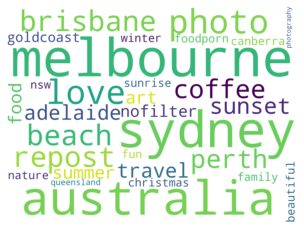

In [9]:
comm_tags = count_hashtags.most_common(30)
hashtag_str = ""
tmp =[]
for i in comm_tags:
    for j in range(int(i[1]/3000)):
        tmp.append(i[0])
        
print(tmp)
hashtag_str = " ".join(j for j in tmp)
wordcloud = WordCloud(background_color="white",width=4000, height=3000, collocations = False).generate(hashtag_str)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
wordcloud.to_file('hashtags.png')

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer 
vader_analyzer = SentimentIntensityAnalyzer() 

In [12]:
score = vader_analyzer.polarity_scores("i am good")
score

{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}

In [13]:
# SENTIMENT ANALYSIS 
# compute the satisfaction difference between traveler and non-traveler

f1 = open('twitter/twitter.json', 'r', encoding='utf-8')

t_start = time.time()
traveller_tweets = []
non_traveller_tweets = []
traveller_score = 0
non_traveller_score = 0
lineCount = 0
traveller_tweet_num = 0
non_traveller_tweet_num = 0

for line in f1:
    try:
        if line.endswith(',\n'):
            record = line[0:-2].lower()
        elif line.endswith('\n'):
            record = line[0:-1].lower()
        
        record = json.loads(record)
        user = record['doc']['user']
        text = record['doc']['text']
        
        if user in traveller:
            traveller_score += vader_analyzer.polarity_scores(text)['compound']
            traveller_tweet_num += 1
        else:
            non_traveller_score += vader_analyzer.polarity_scores(text)['compound']
            non_traveller_tweet_num+= 1
        lineCount += 1
        if lineCount % 100000 == 0:
            print(lineCount, " : ", traveller_score/traveller_tweet_num, non_traveller_score/non_traveller_tweet_num, traveller_tweet_num, non_traveller_tweet_num, time.time()-t_start)
    except:
        pass
    


    
t_diff = time.time()-t_start
print(t_diff)

100000  :  0.21691699569035516 0.1808547033285258 67523 32477 31.86322784423828
200000  :  0.21003352413390197 0.175672681478822 133298 66702 64.65266609191895
300000  :  0.2022683340904458 0.1768158357865811 206926 93074 93.95331263542175
400000  :  0.20207550915145886 0.17296767317085768 275311 124689 127.0868284702301
500000  :  0.20501207058479629 0.1654690153067925 337523 162477 163.20202136039734
600000  :  0.20508497843498646 0.162863516506815 401809 198191 197.75985956192017
700000  :  0.20567211773988975 0.165071113824706 469883 230117 233.3769392967224
800000  :  0.2060208975633738 0.1647079427460807 544786 255214 265.27717542648315
900000  :  0.2043745180408991 0.16453300795269687 615820 284180 300.46015644073486
1000000  :  0.20488431383384637 0.1663968812973687 687370 312630 336.1062421798706
1100000  :  0.2033778754001137 0.16401319894066033 754495 345505 373.64775824546814
1200000  :  0.2057781366746485 0.1657237409334833 828991 371009 409.26583766937256
1300000  :  0.20

In [ ]:
# travel-related tweets vs 
f1 = open('twitter/twitter.json', 'r', encoding='utf-8')

t_start = time.time()

tour_score = 0
lineCount = 0
tour_tweet_num = 0

for line in f1:
    try:
        if line.endswith(',\n'):
            record = line[0:-2].lower()
        elif line.endswith('\n'):
            record = line[0:-1].lower()
        
        record = json.loads(record)
        text = record['doc']['text']
        
        if len(set(record['doc']['hashtags']).intersection(most_common_hashtags)) >0:
            tour_score += vader_analyzer.polarity_scores(text)['compound']
            tour_tweet_num += 1

        lineCount += 1
        if lineCount % 10000 == 0:
            print(lineCount, " : ", tour_score/tour_tweet_num, tour_tweet_num, time.time()-t_start)
    except:
        pass
    


    
t_diff = time.time()-t_start
print(t_diff)

In [ ]:
print(tour_score)
print(tour_tweet_num)
print(tour_score/tour_tweet_num)

In [14]:
# hashtag satisfaction of traveler and non-traveler
f1 = open('twitter/twitter.json', 'r', encoding='utf-8')

t_start = time.time()
rich_num = 0
poor_num = 0
total_rich_score = 0
total_poor_score = 0
lineCount = 0

rich_hashtag_ranking = Counter()
rich_hashtag_count = Counter()
poor_hashtag_ranking = Counter()
poor_hashtag_count = Counter()

for line in f1:
    try:
        if line.endswith(',\n'):
            record = line[0:-2].lower()
        elif line.endswith('\n'):
            record = line[0:-1].lower()
                
        record = json.loads(record)
        text = record['doc']['text']
        user = record['doc']['user']
        hashtags = record['doc']['hashtags']
        
        if user in traveller:
            rich_score = vader_analyzer.polarity_scores(text)['compound']
            total_rich_score += rich_score
            rich_num += 1
            for h in hashtags:
                rich_hashtag_ranking[h] += rich_score
                rich_hashtag_count[h] += 1
        elif user in non_traveller:
            poor_score = vader_analyzer.polarity_scores(text)['compound']
            total_poor_score += poor_score
            poor_num += 1
            for h in hashtags:
                poor_hashtag_ranking[h] += rich_score
                poor_hashtag_count[h] += 1
        lineCount += 1
        if lineCount % 100000 == 0:
            print(lineCount, " : ", total_rich_score/rich_num, total_poor_score/poor_num, rich_num, poor_num, time.time()-t_start)
    except:
        pass
    
t_diff = time.time()-t_start
print(t_diff)

100000  :  0.21691025959986154 0.1808547033285258 67527 32477 32.30732870101929
200000  :  0.21003449385606268 0.175672681478822 133302 66702 66.60310864448547
300000  :  0.2022644242014188 0.1768158357865811 206930 93074 98.15826559066772
400000  :  0.2020756537057454 0.17296767317085768 275315 124689 133.46627593040466
500000  :  0.20501705522815117 0.1654690153067925 337527 162477 175.2907636165619
600000  :  0.20508592828002947 0.162863516506815 401813 198191 219.03368544578552
700000  :  0.2056703669179454 0.165071113824706 469887 230117 266.83218145370483
800000  :  0.20602234897843238 0.1647079427460807 544790 255214 311.42301869392395
900000  :  0.2043776959000404 0.16453300795269687 615824 284180 354.24873328208923
1000000  :  0.20488431383384637 0.16639499894444107 687370 312634 399.2839527130127
1100000  :  0.20337679718595889 0.16401319894066033 754499 345505 446.15258407592773
1200000  :  0.20577748707779123 0.1657237409334833 828995 371009 491.6779131889343
1300000  :  0.

In [37]:
avg_rich_hashtag_ranking = Counter()
for k in rich_hashtag_ranking.keys():
    if rich_hashtag_count[k] >700:
        avg_rich_hashtag_ranking[k] = rich_hashtag_ranking[k]/rich_hashtag_count[k]

avg_poor_hashtag_ranking = Counter()
for k in poor_hashtag_ranking.keys():
    if poor_hashtag_count[k] >400:
        avg_poor_hashtag_ranking[k] = poor_hashtag_ranking[k]/poor_hashtag_count[k]


In [36]:
print("non-traveler hashtag satisfaction")
avg_poor_hashtag_ranking.most_common(30)

non-traveler hashtag satisfaction


[('subscribetokianandjc', 0.2959999999999988),
 ('bbl04', 0.28643447619047635),
 ('cwc15', 0.25619954954954943),
 ('auspol', 0.2507653537563828),
 ('ausvind', 0.24866474103585615),
 ('mkr', 0.24405135501355008),
 ('qanda', 0.22987926605504558),
 ('vote5sos', 0.2214568988173455),
 ('nashsnewvideo', 0.2064810104529614),
 ('endomondo', 0.20367640000000167),
 ('endorphins', 0.20041827586207098),
 ('tbt', 0.1993982511923686),
 ('ausopen', 0.1805650641025641),
 ('followmecaniff', 0.09086931608133092),
 ('livemusic', 0.03855871886120997),
 ('emabiggestfans1d', 0.03572153589315534),
 ('nowplaying', 0.023804547915538744),
 ('navyblues', 0.006731225296442687),
 ('riseandshine', 0.0060891791044776124),
 ('iamcarlton', 0.0031680851063829786),
 ('australianmusic', 0.003124578651685393),
 ('victraffic', 0.0003305017103762828),
 ('savetheworld', 0.0),
 ('superlove', -0.17527036535859142),
 ('gladiator', -0.1961510416666702)]

In [39]:
print("traveler hashtag satisfaction")
avg_rich_hashtag_ranking.most_common(30)

traveler hashtag satisfaction


[('tinnytime', 0.4805724652087439),
 ('independent', 0.4493070813397091),
 ('beeroclock', 0.4212310049423438),
 ('happybirthday', 0.3497056860321404),
 ('streakybay', 0.3412698181818184),
 ('drinklocal', 0.3342781344032081),
 ('fathersday', 0.32864830393487143),
 ('mothersday', 0.32101450459652764),
 ('mpexperience', 0.3181141333333339),
 ('birthday', 0.3072797967722668),
 ('regram', 0.29957939438700193),
 ('darlingharbour', 0.29552003816793915),
 ('blessed', 0.2935301429459294),
 ('grateful', 0.2857086546026753),
 ('happynewyear', 0.2837217125382268),
 ('australiaday', 0.2823658361018843),
 ('kitchen', 0.2787266325224081),
 ('cbr', 0.2733588516746412),
 ('surfersparadise', 0.27223736809435384),
 ('repost', 0.2708726794023994),
 ('merrychristmas', 0.2702185243328108),
 ('f1', 0.2617008583690986),
 ('thankyou', 0.26131607629427805),
 ('tours', 0.2606096453900704),
 ('paleo', 0.2598192650334077),
 ('happiness', 0.25717188710570027),
 ('nye', 0.25298014184397194),
 ('barossa', 0.252494778

In [41]:
for k in count_total_tweets.keys():
    print(k, count_total_tweets[k], count_travel_tweets[k])

12401 11587 1108
20604 396568 51332
60302 1962 181
10604 845 84
11703 369309 41427
12104 29994 3778
30910 42720 6643
21201 7365 176
40502 2239 192
20403 12573 1024
31603 14831 1451
30501 98683 14288
21005 30280 1918
20607 87621 7481
20302 23242 942
20602 13636 1238
20605 86748 8839
21205 25043 797
11801 91885 11563
und 89741 16222
20701 32072 1616
11701 25573 2415
80105 18948 5337
11702 23763 1865
10603 6279 502
11902 8090 245
12501 20546 1387
12403 12949 357
10601 11396 887
12101 15215 1165
20803 20910 1101
12203 23666 2527
31004 3225 183
31003 4163 312
30503 20267 1821
40101 62270 11460
40106 2426 215
40401 11900 1304
11802 33593 3890
20802 26748 1614
20703 12678 363
40102 8346 784
20606 51217 4341
30504 11269 945
30203 13558 1260
31106 3093 135
30302 10660 729
30502 4585 331
31402 2456 106
30204 3516 127
31305 5382 393
20303 13346 1420
11402 5479 562
20902 14468 817
20903 5899 265
20901 14404 551
30602 11029 777
30604 5287 546
30605 2481 232
21105 28152 2053
30907 11551 959
10201 16